# BREAST CANCER PREDICTION

---
---

Breast cancer is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

Early detection of breast cancer has saved lives of many women around the world. 

Our model will look at this as a classification problem and try to provide accurate prediction of breast cancer using previously recorded health reports clubbed in a dataset.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/data.csv')

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
dataset.shape

(569, 33)

In [ ]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### **ABOUT THE DATASET**

- It contains 569 rows and 33 columns out of which the last column (i.e. Unnamed:32) has all NaN or null values.

- None of the other columns or rows have any null values present.

- The 33 columns are namely:

  * ID - ID number
  * DIAGNOSIS - The diagnosis of breast tissues (M = malignant, B = benign)
  * RADIUS_MEAN - mean of distances from center to points on the perimeter
  * TEXTURE_MEAN - standard deviation of gray-scale values
  * PERIMETER_MEAN - mean size of the core tumor
  * AREA_MEAN - mean are of the core tumor
  * SMOOTHNESS_MEAN - mean of local variation in radius lengths
  * COMPACTNESS_MEAN - mean of perimeter^2 / area - 1.0
  * CONCAVITY_MEAN - mean of severity of concave portions of the contour
  * CONCAVE POINTS_MEAN - mean for number of concave portions of the contour
  * SYMMETRY_ MEAN
  * FRACTAL DIMENSION_MEAN - mean for "coastline approximation - 1"
  * RADIUS_SE
  * TEXTURE_SE
  * PERIMETER_SE
  * AREA_SE
  * SMOOTHNESS_SE
  * COMPACTNESS_SE
  * CONCAVITY_SE
  * CONCAVE POINTS_SE
  * SYMMETRY_ SE
  * FRACTAL DIMENSION_SE
  * RADIUS_WORST
  * TEXTURE_WORST
  * PERIMETER_WORST
  * AREA_WORST
  * SMOOTHNESS_WORST
  * COMPACTNESS_WORST
  * CONCAVITY_WORST
  * CONCAVE POINTS_WORST
  * SYMMETRY_ WORST
  * FRACTAL DIMENSION_WORST


  [ here MEAN is average, SE is standard error and WORST is the largest mean value]


### **DATA EXPLORATION AND ANALYSIS**

In [ ]:
dataset.drop('id', axis = 1, inplace = True)

In [ ]:
dataset.drop('Unnamed: 32', axis = 1, inplace = True)

In [ ]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cf0e44550>,
      dtype=object)

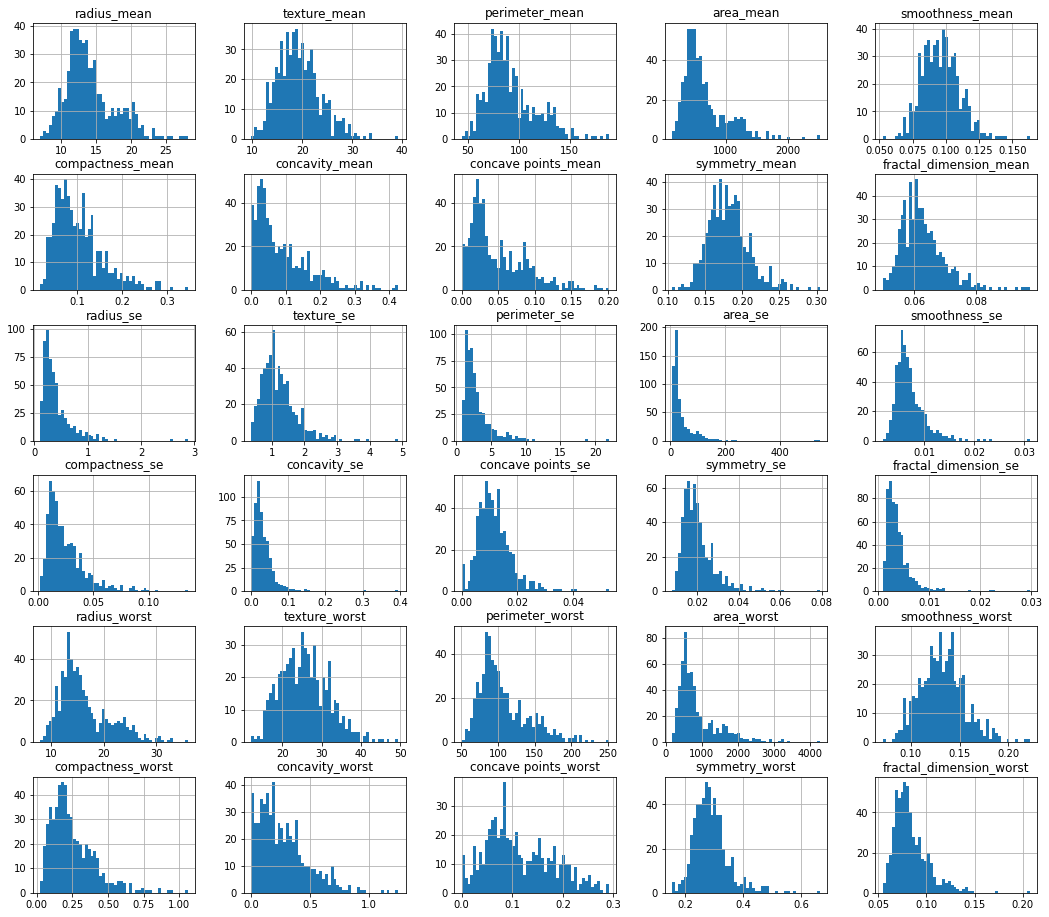

In [ ]:
dataset.hist(bins = 50, figsize = (18, 16))

In [ ]:
features_mean = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
features_SE = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se'] 
features_worst = ['radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']

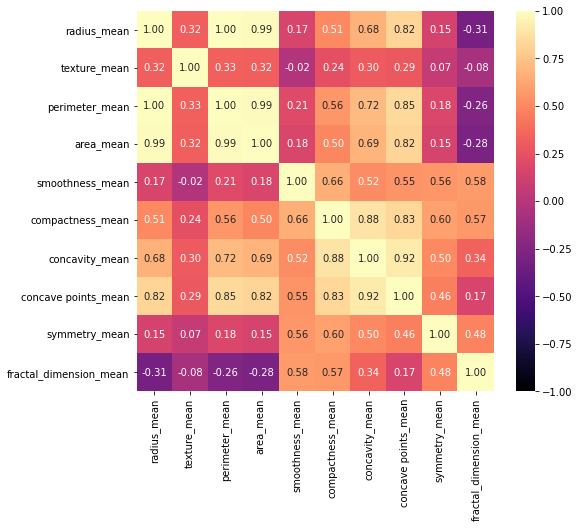

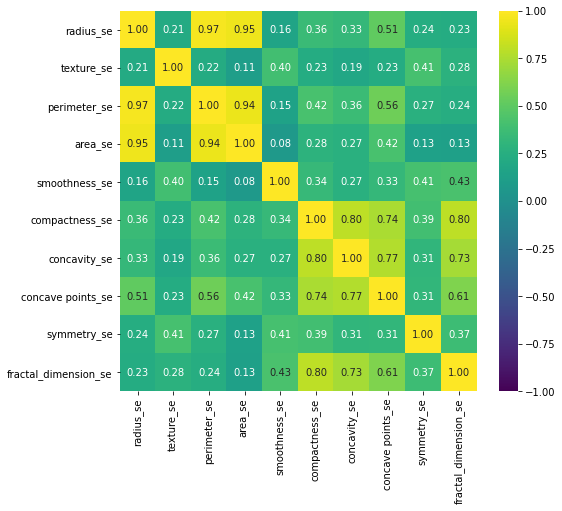

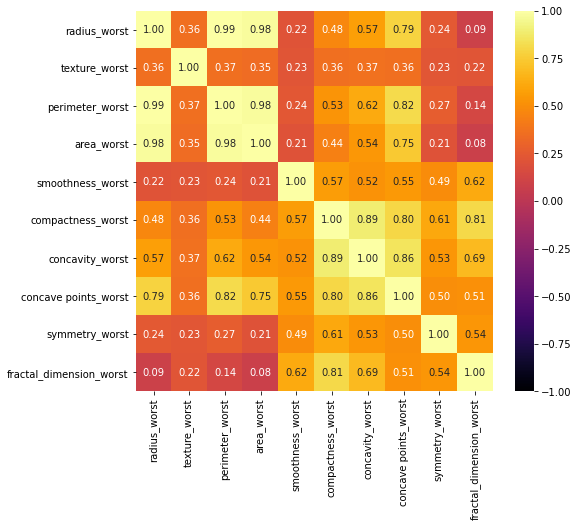

In [ ]:
# CORRELATION HEATMAP
all_features = features_mean.copy()
plt.figure(figsize=(8, 7))
sns.heatmap(dataset[all_features].corr(method='pearson'), vmin=-1, vmax=1, cmap='magma', annot=True, fmt='.2f');

all_features = features_SE.copy()
plt.figure(figsize=(8, 7))
sns.heatmap(dataset[all_features].corr(method='pearson'), vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f');

all_features = features_worst.copy()
plt.figure(figsize=(8, 7))
sns.heatmap(dataset[all_features].corr(method='pearson'), vmin=-1, vmax=1, cmap='inferno', annot=True, fmt='.2f');


In [ ]:
# diagnosis is the final event, convert catagorical features into binary
dataset.diagnosis[dataset.diagnosis == 'M'] = 1
dataset.diagnosis[dataset.diagnosis == 'B'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### PRINCIPAL COMPONENT ANALYSIS

Principal component analysis (PCA) is a statistical method to reduce dimensionality. PCA is mostly used on high dimensional dataset with loads of variables.

Our dataset has 30 features, we'll perform 2 component PCA over it to reduce those 30 features to just 2.


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.98183264, 0.01613661])

### FITTING THE TRAIN AND TEST SETS IN CLASSIFIERS

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# SPLIT THE DATASET
from sklearn.model_selection import train_test_split

X = np.array(dataset.drop(['diagnosis'], axis = 1))
y = np.array(dataset['diagnosis'])

In [ ]:
X_train , X_test , y_train , y_test = train_test_split( X, y, test_size = 0.2, random_state = 42 )

In [ ]:
# K NEAREST NEIGHBOURS CLASSIFIER

y_train=y_train.astype(int)

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(5)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("Train score = ",KNN.score(X_train,y_train),"%")

Train score =  0.9252747252747253 %


In [ ]:
y_test=y_test.astype(int)
KNN.fit(X_test, y_test)
print("Test score = ",KNN.score(X_test,y_test),"%")

Test score =  0.9649122807017544 %


In [ ]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

print("Train score = ", accuracy_score(y_train, RFC.predict(X_train)))

Train score =  1.0


In [ ]:
print("Test score = ", accuracy_score(y_test, RFC.predict(X_test)))

Test score =  0.9473684210526315


In [ ]:
from sklearn.metrics import confusion_matrix

cm_RF = confusion_matrix(y_test, RFC[0].predict(X_test))
print(cm_RF)

[[68  3]
 [ 5 38]]


In [ ]:
# DECISION TREES CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print("Train score = ", accuracy_score(y_train, DT.predict(X_train)))

Train score =  1.0


In [ ]:
print("Test score = ", accuracy_score(y_test, DT.predict(X_test)))

Test score =  0.9473684210526315


In [ ]:
# SVM CLASSIFIER

from sklearn.svm import SVC

SVC = SVC()
SVC.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Train score = ", accuracy_score(y_train, SVC.predict(X_train)))

Train score =  0.9164835164835164


In [ ]:
print("Test score = ", accuracy_score(y_test, SVC.predict(X_test)))

Test score =  0.9473684210526315


In [ ]:
# ADABOOST CLASSIFIER

from sklearn.ensemble import AdaBoostClassifier

ADB_C = AdaBoostClassifier()
ADB_C.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
print("Train score = ", accuracy_score(y_train, ADB_C.predict(X_train)))

Train score =  0.9714285714285714


In [ ]:
print("Test score = ", accuracy_score(y_test, ADB_C.predict(X_test)))

Test score =  0.956140350877193


In [ ]:
cm_ADB = confusion_matrix(y_test, ADB_C[0].predict(X_test))
print(cm_ADB)

[[71  0]
 [ 6 37]]


In [ ]:
# GAUSSIAN NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)  

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print("Train score = ", accuracy_score(y_train, GNB.predict(X_train)))

Train score =  0.8945054945054945


In [ ]:
print("Test score = ", accuracy_score(y_test, GNB.predict(X_test)))

Test score =  0.9385964912280702


### COMPARING THE ACCURACY OF ALL THE MODELS 

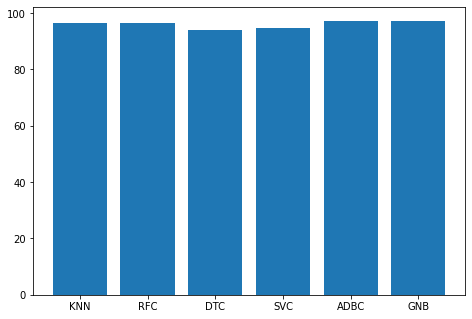

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['KNN', 'RFC', 'DTC', 'SVC', 'ADBC', 'GNB']
Scores = [96.49122807017544, 96.49122807017544, 93.85964912280702, 94.73684210526315, 97.36842105263158, 97.36842105263158]
ax.bar(Models, Scores)
plt.show()

- AdaBoost and Gaussian Naive Bayes gave us highest and equal accuracy, we can pick any one of them for our final model. 

### PREDICTIONS OF FINAL MODEL

In [ ]:
pred = ADB_C.predict(X_test)

In [ ]:
print(pred)

[1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


In [ ]:
print(y_test)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


In [ ]:
pred_dtFrame = pd.DataFrame({'Diagnosis Result' : pred})
print(pred_dtFrame)

     Diagnosis Result
0                   1
1                   1
2                   1
3                   0
4                   0
..                ...
109                 0
110                 1
111                 0
112                 0
113                 1

[114 rows x 1 columns]
